### 1-Read Dataset

In [2]:
# import liabary
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# delete warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\Datasets\insurance_claims.csv')

In [5]:
# show first 5 row of data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### 2-EDA

In [7]:
# display shape of data
data.shape

(1000, 40)

In [8]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
# categorical column of data
categorical=[]
for i in data.columns:
    if data[i].dtype=='object':
        categorical.append(i)
print(categorical)        

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [10]:
for i in categorical:
    print(f'column name : {i}')
    print(data[i].unique())
    print("--"*40)

column name : policy_bind_date
['2014-10-17' '2006-06-27' '2000-09-06' '1990-05-25' '2014-06-06'
 '2006-10-12' '2000-06-04' '1990-02-03' '1997-02-05' '2011-07-25'
 '2002-05-26' '1999-05-29' '1997-11-20' '2012-10-26' '1998-12-28'
 '1992-10-19' '2005-06-08' '2004-11-15' '2014-12-28' '1992-08-02'
 '2002-06-25' '2005-11-27' '1994-05-27' '1991-02-08' '1996-02-02'
 '2013-12-05' '1990-09-20' '2002-07-18' '1990-02-08' '2014-03-04'
 '2000-02-18' '2008-06-19' '2003-08-01' '1992-04-04' '1991-01-13'
 '2010-08-08' '2003-03-09' '1993-02-03' '2002-11-25' '1997-07-27'
 '1995-05-08' '2012-08-30' '2006-04-30' '2003-04-13' '2007-12-05'
 '2006-08-21' '1990-01-08' '1990-03-18' '2008-01-07' '1997-03-10'
 '2004-01-10' '1994-08-20' '2002-06-02' '1994-04-28' '2014-08-17'
 '2007-08-11' '2008-11-20' '1995-10-18' '1993-05-19' '2005-02-26'
 '1990-02-14' '1993-09-30' '2014-06-10' '2008-10-28' '2007-04-24'
 '1993-12-13' '2011-08-17' '1990-08-20' '1994-02-11' '1994-02-22'
 '2011-08-15' '1998-11-11' '1995-12-04' '2002

In [11]:
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
# replace ? value to nan
data.replace('?',np.nan,inplace=True)

In [13]:
data.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [14]:
# display name of columns
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [15]:
# check duplicated
data.duplicated().sum()

0

In [16]:
# check missing values
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [17]:
data['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Name: count, dtype: int64

In [18]:
# handle missing value in collision_type column by use most commen value
data['collision_type']=data['collision_type'].fillna(data['collision_type'].mode()[0])

In [19]:
data['collision_type'].value_counts()

collision_type
Rear Collision     470
Side Collision     276
Front Collision    254
Name: count, dtype: int64

In [20]:
data['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [21]:
# handle missing value in authorities_contacted column by use most commen value
data['authorities_contacted']=data['authorities_contacted'].fillna(data['authorities_contacted'].mode()[0])

In [22]:
data['authorities_contacted'].value_counts()

authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [23]:
data['property_damage'].value_counts()

property_damage
NO     338
YES    302
Name: count, dtype: int64

In [24]:
# handle missing value in property_damage column by use most commen value
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])

In [25]:
data['property_damage'].value_counts()

property_damage
NO     698
YES    302
Name: count, dtype: int64

In [26]:
data['police_report_available'].value_counts()

police_report_available
NO     343
YES    314
Name: count, dtype: int64

In [27]:
# handle missing value in police_report_available column by use most commen value
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [28]:
data['police_report_available'].value_counts()

police_report_available
NO     686
YES    314
Name: count, dtype: int64

In [29]:
data['_c39'].value_counts()

Series([], Name: count, dtype: int64)

In [30]:
# drop _c39 column
data.drop(['_c39'],axis=1,inplace=True)

In [31]:
# check missing values
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [32]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [33]:
# drop non important columns
drop_list=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location',
           'incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
data.drop(drop_list,axis=1,inplace=True)

In [34]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [35]:
# categorical column of data
categorical=[]
for i in data.columns:
    if data[i].dtype=='object':
        categorical.append(i)
print(categorical)        

['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available', 'fraud_reported']


In [36]:
# Encoding categorical column 
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for i in categorical:
    data[i]=encoder.fit_transform(data[i])

In [37]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1,1000,1406.91,0,1,4,2,0,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,1,2000,1197.22,5000000,1,4,6,2,...,1,0,0,0,0,5070,780,780,3510,1
2,134,29,0,2000,1413.14,5000000,0,6,11,3,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,1,2000,1415.74,6000000,0,6,1,4,...,1,0,1,2,0,63400,6340,6340,50720,1
4,228,44,2,1000,1583.91,6000000,1,0,11,4,...,1,0,0,1,0,6500,1300,650,4550,0


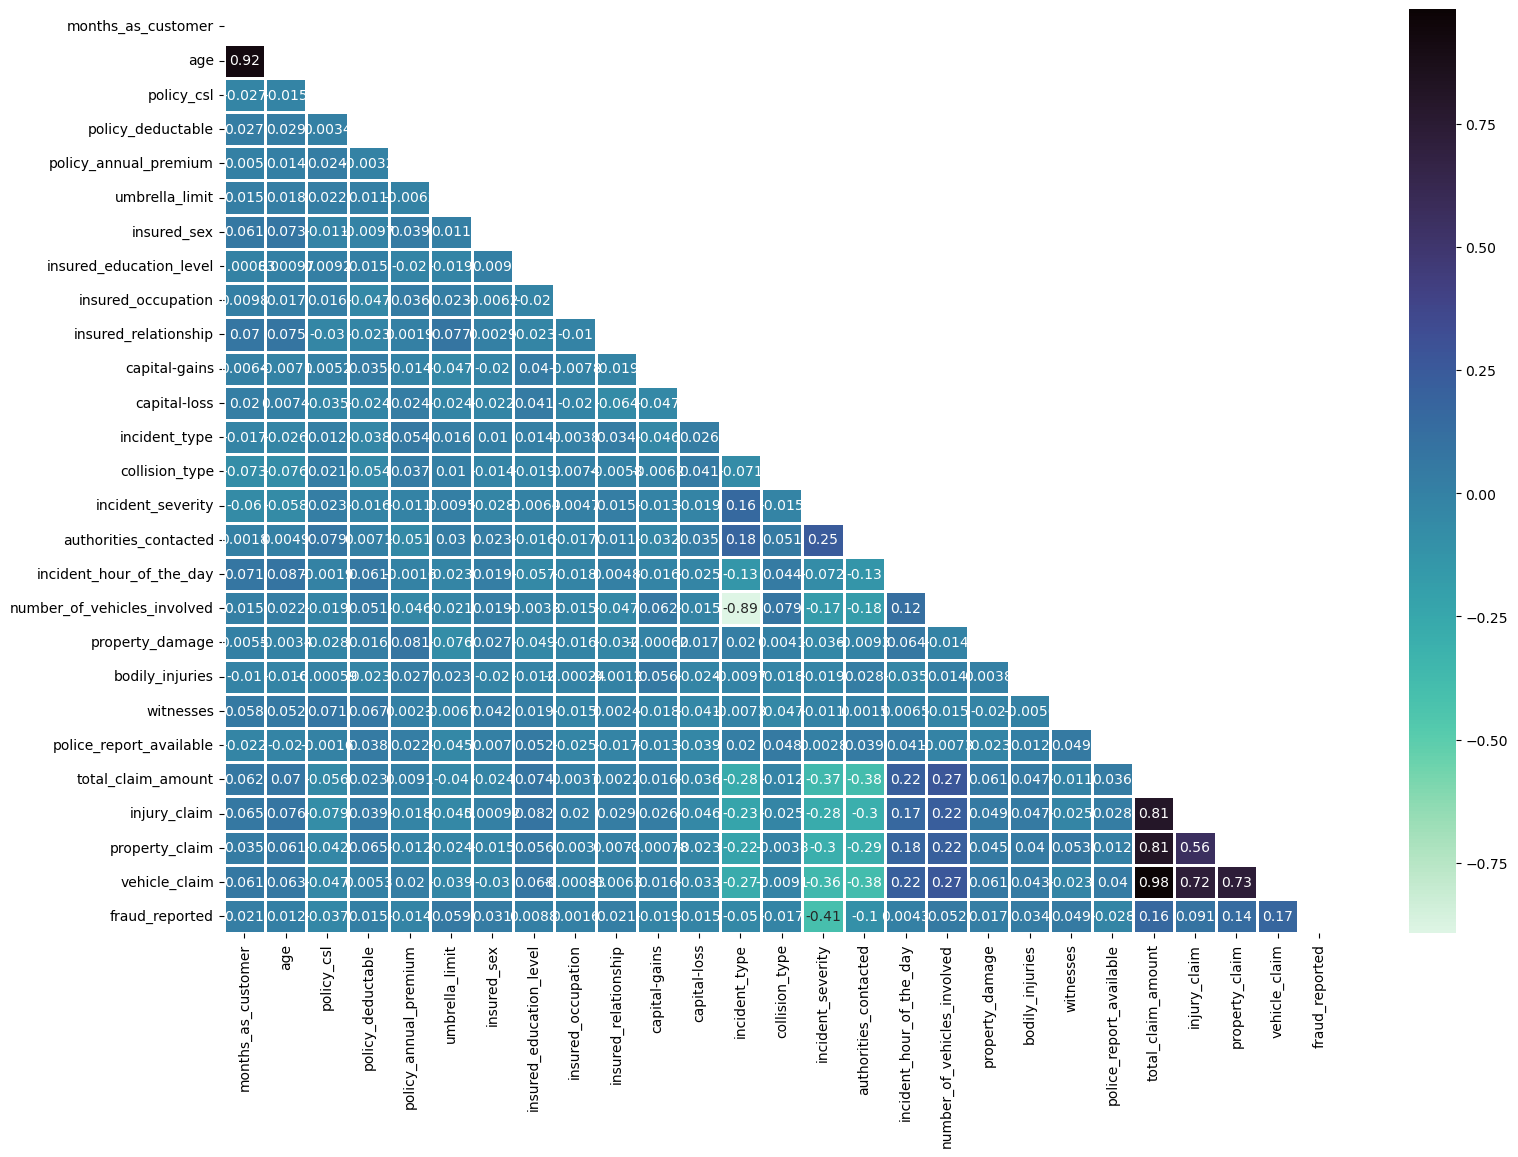

In [38]:
# check for corrlation
plt.figure(figsize=(18,12))
corr=data.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True,cmap='mako_r',fmt='.2g',linewidth=1) 
plt.show()

In [39]:
# drop columns with corrlation high
data.drop(['age','total_claim_amount'],axis=1,inplace=True)

In [40]:
data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1,1000,1406.91,0,1,4,2,0,53300,...,5,1,1,1,2,1,6510,13020,52080,1
1,228,1,2000,1197.22,5000000,1,4,6,2,0,...,8,1,0,0,0,0,780,780,3510,1
2,134,0,2000,1413.14,5000000,0,6,11,3,35100,...,7,3,0,2,3,0,7700,3850,23100,0
3,256,1,2000,1415.74,6000000,0,6,1,4,48900,...,5,1,0,1,2,0,6340,6340,50720,1
4,228,2,1000,1583.91,6000000,1,0,11,4,66000,...,20,1,0,0,1,0,1300,650,4550,0


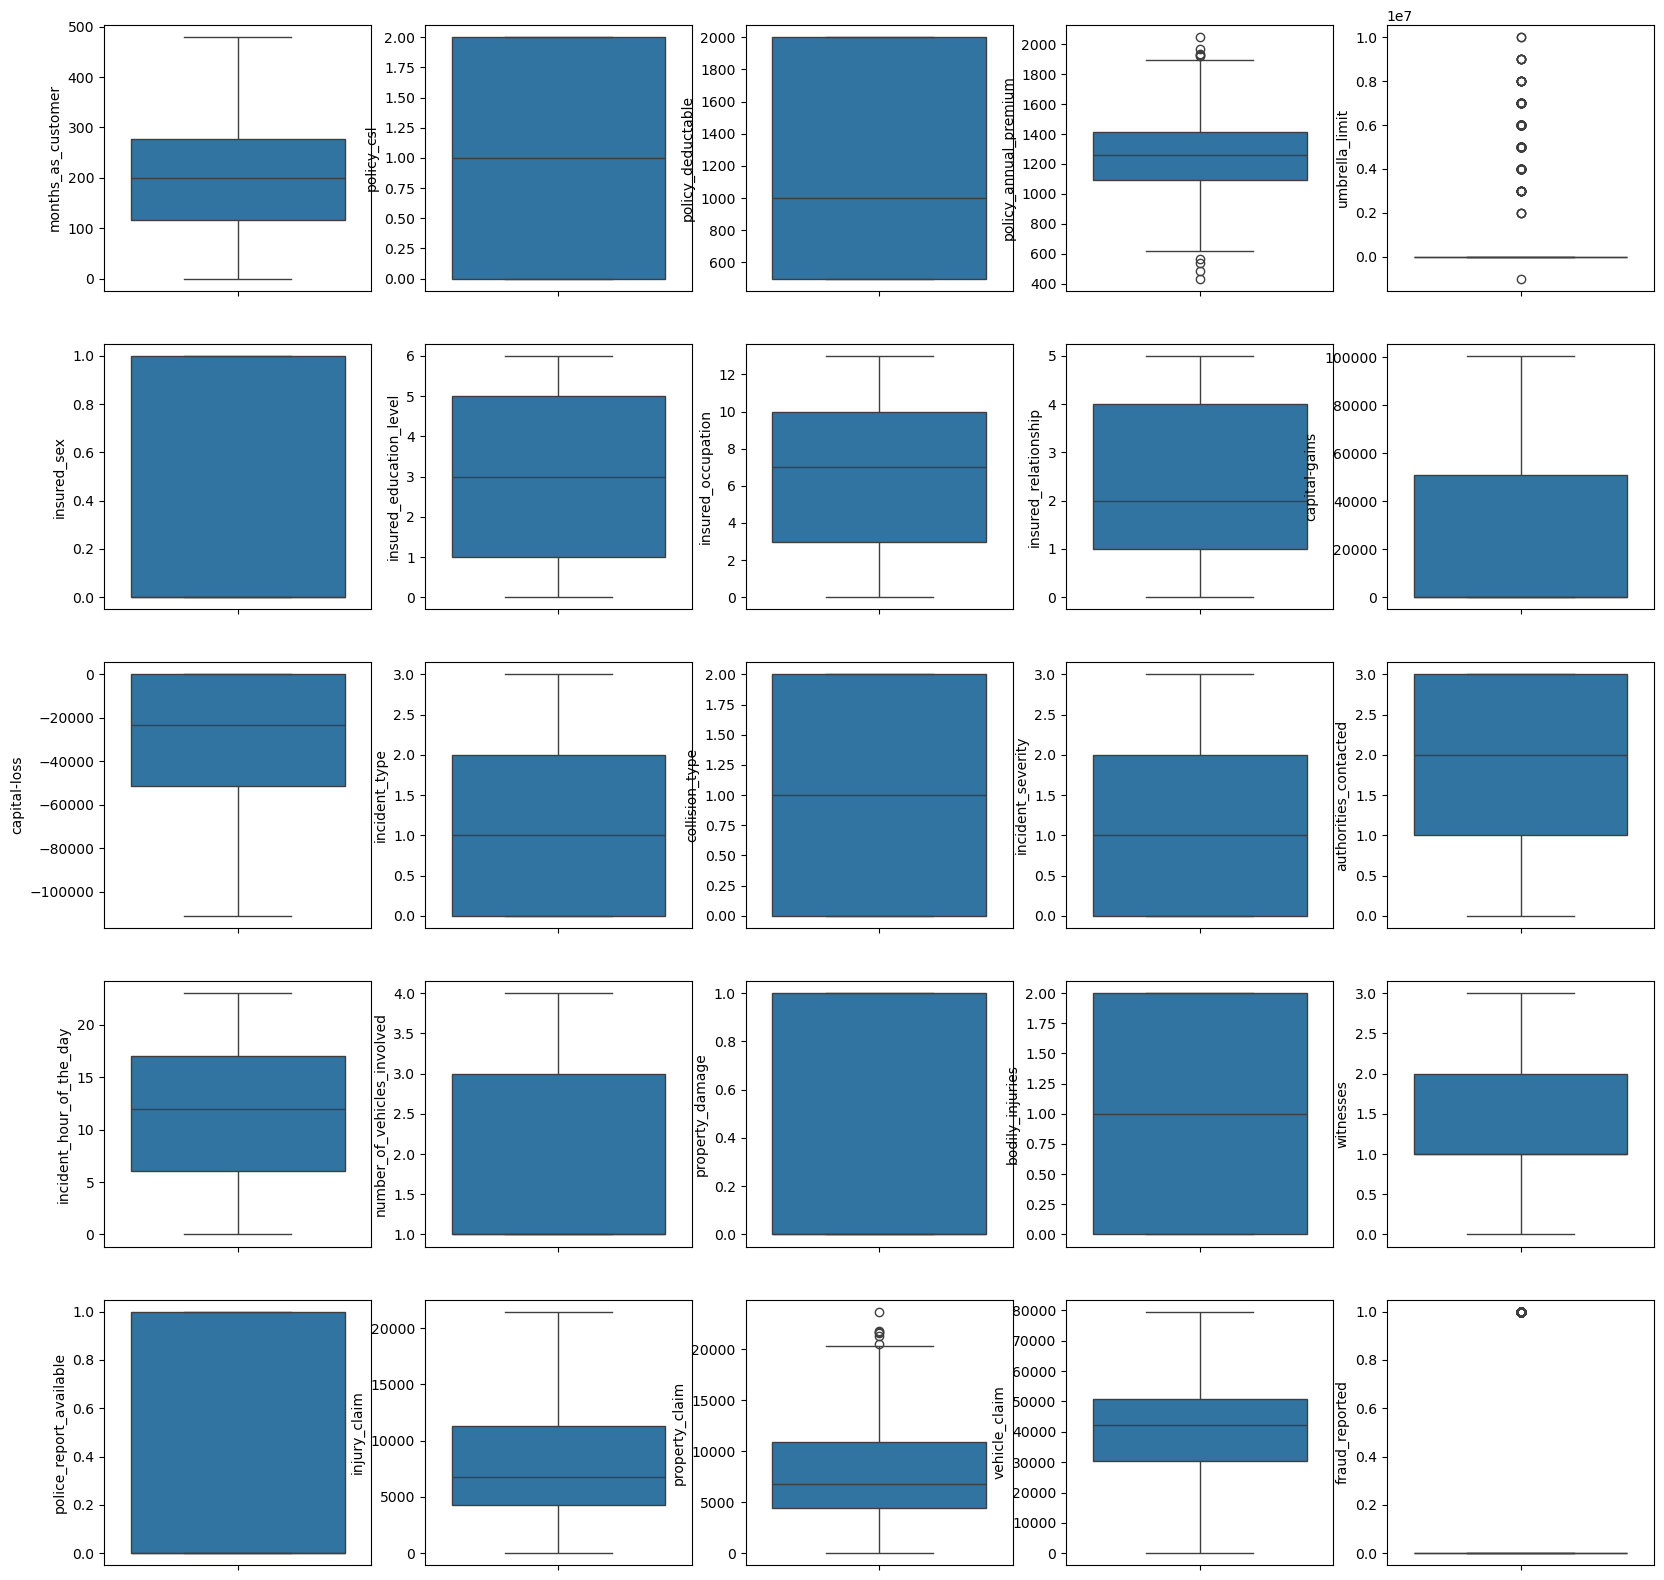

In [41]:
# plot boxplot to know outlier
plt.figure(figsize=(20,20))
s=1
for i in data.columns:
    plt.subplot(5,5,s)
    sns.boxplot(data[i])
    s+=1

In [42]:
# split data into feature(x) and label(y)
x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

In [43]:
# split data into data_train and data_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,stratify=y,shuffle=True,random_state=42)

In [44]:
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)

x_train shape : (800, 24)
y_train shape : (800,)


In [45]:
print('x_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)

x_test shape : (200, 24)
y_test shape : (200,)


In [46]:
# show maximum value in columns
np.max(x_train,axis=0)

months_as_customer                  479.00
policy_csl                            2.00
policy_deductable                  2000.00
policy_annual_premium              2047.59
umbrella_limit                 10000000.00
insured_sex                           1.00
insured_education_level               6.00
insured_occupation                   13.00
insured_relationship                  5.00
capital-gains                    100500.00
capital-loss                          0.00
incident_type                         3.00
collision_type                        2.00
incident_severity                     3.00
authorities_contacted                 3.00
incident_hour_of_the_day             23.00
number_of_vehicles_involved           4.00
property_damage                       1.00
bodily_injuries                       2.00
witnesses                             3.00
police_report_available               1.00
injury_claim                      21450.00
property_claim                    23670.00
vehicle_cla

In [47]:
# show miximum value in columns
np.min(x_train,axis=0)

months_as_customer                   0.00
policy_csl                           0.00
policy_deductable                  500.00
policy_annual_premium              433.33
umbrella_limit                -1000000.00
insured_sex                          0.00
insured_education_level              0.00
insured_occupation                   0.00
insured_relationship                 0.00
capital-gains                        0.00
capital-loss                   -111100.00
incident_type                        0.00
collision_type                       0.00
incident_severity                    0.00
authorities_contacted                0.00
incident_hour_of_the_day             0.00
number_of_vehicles_involved          1.00
property_damage                      0.00
bodily_injuries                      0.00
witnesses                            0.00
police_report_available              0.00
injury_claim                         0.00
property_claim                       0.00
vehicle_claim                     

In [48]:
y_train.value_counts()

fraud_reported
0    602
1    198
Name: count, dtype: int64

In [49]:
# over sampling of data by use SMOTE
from imblearn.over_sampling import SMOTE
S=SMOTE(random_state=0)
x_train,y_train=S.fit_resample(x_train,y_train)

In [50]:
y_train.value_counts()

fraud_reported
0    602
1    602
Name: count, dtype: int64

In [51]:
cols=x_train.columns

In [52]:
# scalling data
from sklearn.preprocessing import StandardScaler

Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [53]:
x_train=pd.DataFrame(x_train,columns=cols)

In [54]:
x_test=pd.DataFrame(x_test,columns=cols)

### 3-Build Model

In [56]:
# use decision tree
from sklearn.tree import DecisionTreeClassifier

In [57]:
# calling decision tree model
DT=DecisionTreeClassifier()

In [58]:
# fit  Decision tree model on train data (x_train,y_train)
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
# predict Decision tree model by use (x_test)
y_pred_DT=DT.predict(x_test)

In [60]:
print('first 10 value of y predict =',y_pred_DT[:10])
print('--'*40)
print('first 10 value of y actual =',y_test.values[:10])

first 10 value of y predict = [0 0 0 1 0 0 0 1 0 0]
--------------------------------------------------------------------------------
first 10 value of y actual = [0 1 1 1 0 0 1 1 0 0]


In [61]:
# model Evaluate
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [62]:
# test score
y_pred_test=DT.predict(x_test)
print('test score =',accuracy_score(y_test,y_pred_test))

test score = 0.685


In [63]:
# train score
y_pred_train=DT.predict(x_train)
print('train score =',accuracy_score(y_train,y_pred_train))

train score = 1.0


In [64]:
# classification_report
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       151
           1       0.40      0.59      0.48        49

    accuracy                           0.69       200
   macro avg       0.62      0.65      0.63       200
weighted avg       0.74      0.69      0.70       200



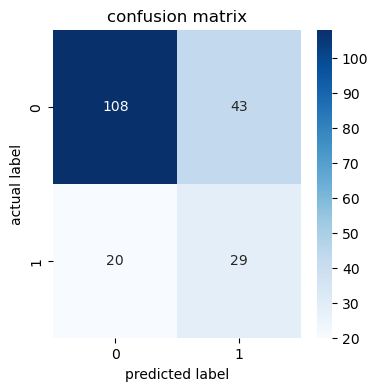

In [65]:
# plot confusion_matrix
cm=confusion_matrix(y_test,y_pred_DT)

plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

In [66]:
# use grid search on Decision tree model
from sklearn.model_selection import GridSearchCV

DT_model=DecisionTreeClassifier(random_state=42)

params={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[5,10,20,30],
    'min_samples_split':list(range(1,10)),
    'min_samples_leaf':list(range(1,10))
}
grid_DT=GridSearchCV(estimator=DT_model,param_grid=params,cv=5,n_jobs=-1)
grid_DT.fit(x_train, y_train)
best_p=grid_DT.best_params_
print(best_p)
print(grid_DT.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
0.7840905947441217


In [67]:
DT_model_g = DecisionTreeClassifier(**best_p,random_state=42)
DT_model_g.fit(x_train, y_train)
DT_pred = DT_model_g.predict(x_test)
train_DT_pred = DT_model_g.predict(x_train)
print("Testing Classification Report : ")
print(classification_report(y_test, DT_pred))
print("Training Classification Report : ")
print(classification_report(y_train, train_DT_pred))

Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       151
           1       0.56      0.78      0.65        49

    accuracy                           0.80       200
   macro avg       0.74      0.79      0.75       200
weighted avg       0.83      0.80      0.80       200

Training Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       602
           1       0.86      0.85      0.85       602

    accuracy                           0.86      1204
   macro avg       0.86      0.86      0.86      1204
weighted avg       0.86      0.86      0.86      1204



In [68]:
# use random forest algorithm
from sklearn.ensemble import RandomForestClassifier

In [69]:
# calling random forest algorithm
RF=RandomForestClassifier()

In [70]:
# fit  random forest model on train data (x_train,y_train)
RF.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
# predict random forest model by use (x_test)
y_pred_RF=RF.predict(x_test)

In [72]:
print('first 10 value of y predict =',y_pred_RF[:10])
print('--'*40)
print('first 10 value of y actual =',y_test.values[:10])

first 10 value of y predict = [0 1 0 1 0 0 1 1 0 0]
--------------------------------------------------------------------------------
first 10 value of y actual = [0 1 1 1 0 0 1 1 0 0]


In [73]:
# test score
y_pred_test=RF.predict(x_test)
print('test score =',accuracy_score(y_test,y_pred_test))

test score = 0.82


In [74]:
# train score
y_pred_train=RF.predict(x_train)
print('train score =',accuracy_score(y_train,y_pred_train))

train score = 1.0


In [75]:
# classification_report
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       151
           1       0.63      0.65      0.64        49

    accuracy                           0.82       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.82      0.82      0.82       200



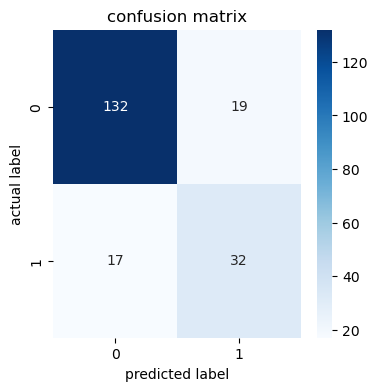

In [76]:
# plot confusion_matrix
cm=confusion_matrix(y_test,y_pred_RF)

plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

In [77]:
# use grid search on Random_forest model
RF_Model = RandomForestClassifier(random_state=42)
params = {
   'criterion' : ['gini', 'entropy'],
    'max_depth': [10,20,30],
    'n_estimators' : [50,100,200,150],
    'max_features' : ['sqrt', 'log2']
}
grid_search = GridSearchCV(RF_Model, params, cv = 5,n_jobs=-1)
grid_search.fit(x_train, y_train)
best_pp=grid_search.best_params_
print(best_pp)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
0.8571715076071923


In [78]:
RF_Model_g = RandomForestClassifier(**best_pp,random_state=42)
RF_Model_g.fit(x_train, y_train)
RF_pred = RF_Model_g.predict(x_test)
train_RF_pred = RF_Model_g.predict(x_train)
print("Testing Classification Report RandomForestClassifier: ")
print(classification_report(y_test, RF_pred))
print("Training Classification Report RandomForestClassifier: ")
print(classification_report(y_train, train_RF_pred))

Testing Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       151
           1       0.61      0.67      0.64        49

    accuracy                           0.81       200
   macro avg       0.75      0.77      0.76       200
weighted avg       0.82      0.81      0.82       200

Training Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       602
           1       0.99      1.00      1.00       602

    accuracy                           1.00      1204
   macro avg       1.00      1.00      1.00      1204
weighted avg       1.00      1.00      1.00      1204



In [79]:
# use Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# use grid search on Gradient Boosting Classifier

GB_model=GradientBoostingClassifier(random_state=42)

params={
    'criterion':['friedman_mse','squared_error'],
    'max_depth':[5,10,20,30],
    'min_samples_split':list(range(1,10)),
    'min_samples_leaf':list(range(1,10))
}
grid_GB=GridSearchCV(estimator=GB_model,param_grid=params,cv=5,n_jobs=-1)
grid_GB.fit(x_train, y_train)
best_ppp=grid_GB.best_params_
print(best_ppp)
print(grid_GB.best_score_)

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.8530221300138313


In [81]:
GB_Model_g = GradientBoostingClassifier(**best_ppp,random_state=42)
GB_Model_g.fit(x_train, y_train)
GB_pred = GB_Model_g.predict(x_test)
train_GB_pred = GB_Model_g.predict(x_train)
print("Testing Classification Report GradientBoostingClassifier: ")
print(classification_report(y_test, GB_pred))
print("Training Classification Report GradientBoostingClassifier: ")
print(classification_report(y_train, train_GB_pred))

Testing Classification Report GradientBoostingClassifier: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       151
           1       0.60      0.57      0.58        49

    accuracy                           0.80       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.80      0.80      0.80       200

Training Classification Report GradientBoostingClassifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00       602

    accuracy                           1.00      1204
   macro avg       1.00      1.00      1.00      1204
weighted avg       1.00      1.00      1.00      1204



In [82]:
!pip install xgboost

In [83]:
# use xgboost
from xgboost import XGBClassifier

In [181]:
# use grid search on XGBClassifier

XGB_model=XGBClassifier(random_state=42)

params_XGB = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],  # Lower learning rates to reduce overfitting
    'reg_lambda': [1, 1.5, 2]            # L2 regularization
}
grid_XGB=GridSearchCV(estimator=XGB_model,param_grid=params_XGB,cv=5,n_jobs=-1,verbose=2)
grid_XGB.fit(x_train, y_train)
best_pppp=grid_XGB.best_params_
print(best_pppp)
print(grid_XGB.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'reg_lambda': 1.5}
0.8480567081604425


In [183]:
XGB_Model_g = XGBClassifier(**best_pppp,random_state=42)
XGB_Model_g.fit(x_train, y_train)
XGB_pred = XGB_Model_g.predict(x_test)
train_XGB_pred = XGB_Model_g.predict(x_train)
print("Testing Classification Report XGBClassifier: ")
print(classification_report(y_test, XGB_pred))
print("Training Classification Report XGBClassifier: ")
print(classification_report(y_train, train_XGB_pred))

Testing Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       151
           1       0.53      0.51      0.52        49

    accuracy                           0.77       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.77      0.77      0.77       200

Training Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00       602

    accuracy                           1.00      1204
   macro avg       1.00      1.00      1.00      1204
weighted avg       1.00      1.00      1.00      1204



### Vooting Classifier

In [185]:
from sklearn.ensemble import VotingClassifier

classifiers=[('Decision Tree',DT_model_g),('Random Forest',RF_Model_g),('Gradient Boosting',GB_Model_g),('xgboost',XGB_Model_g)]

voting_model=VotingClassifier(estimators=classifiers)
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_test)
train_voting_pred =voting_model.predict(x_train)
print("Testing Classification Report VotingClassifier: ")
print(classification_report(y_test, voting_pred))
print("Training Classification Report VotingClassifier: ")
print(classification_report(y_train, train_voting_pred))

Testing Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       151
           1       0.60      0.57      0.58        49

    accuracy                           0.80       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.80      0.80      0.80       200

Training Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00       602

    accuracy                           1.00      1204
   macro avg       1.00      1.00      1.00      1204
weighted avg       1.00      1.00      1.00      1204

